In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("3-customersatisfaction.csv")

In [4]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

<Axes: xlabel='Customer Satisfaction', ylabel='Incentive'>

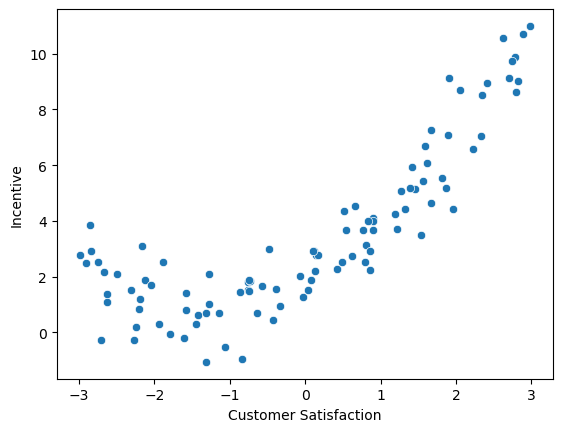

In [8]:
sns.scatterplot(x="Customer Satisfaction",y="Incentive",data=df)

In [10]:
X= df[["Customer Satisfaction"]]
y= df["Incentive"]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15,test_size=0.2)

In [14]:
X_train

,Customer Satisfaction
99,0.512504
3,2.625838
20,-0.865714
55,-1.145369
6,2.823460
...,...
28,1.191020
0,-1.282447
5,-1.311432
12,0.490521


In [15]:
regression = LinearRegression()

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = regression.predict(X_test)

In [21]:
score = r2_score(y_test,y_pred)

In [23]:
print(score) # kötü model

0.2705652535622246


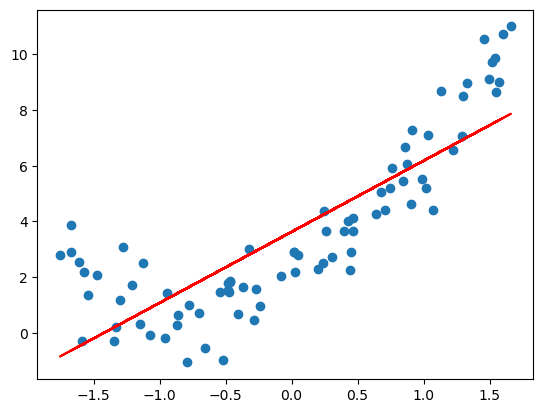

In [25]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="r") # model uymadı

In [26]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [27]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)

LinearRegression()

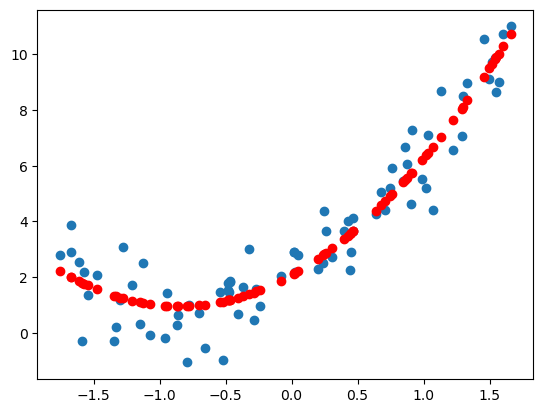

In [30]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="r")

In [32]:
y_pred = regression.predict(X_test_poly)
r2_score(y_test,y_pred)
print(score)

0.2705652535622246
